<a href="https://colab.research.google.com/github/NijilChandran/Sustainability/blob/main/Sustainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upload = files.upload()

In [4]:
!unzip Participants_Data_WSMLC.zip

Archive:  Participants_Data_WSMLC.zip
  inflating: train.csv               
replace __MACOSX/._train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._train.csv    
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
  inflating: sample_submission.csv   
  inflating: __MACOSX/._sample_submission.csv  


In [5]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [6]:
df_test = pd.read_csv("test.csv")
df_test.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [7]:
df_train.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag'],
      dtype='object')

In [8]:
X_cols=['Year', 'Month', 'Day', 'Hour', 'Minute','Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag']
y_cols = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

In [9]:
X_nmpy =  df_train[X_cols].to_numpy()
y_nmpy =  df_train[y_cols].to_numpy()

In [10]:
X_test_nmpy = df_test[X_cols].to_numpy()
y_test_nmpy = df_test[y_cols].to_numpy()

In [22]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_nmpy, y_nmpy,test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.2)

In [23]:
print(X_nmpy.shape[0])
print(X_train_full.shape[0])
print(X_test.shape[0])
print(X_train.shape[0])
print(X_valid.shape[0])

175296
140236
35060
112188
28048


In [39]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [40]:
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential([
	 Dense(600, input_dim=n_inputs, activation='relu'),
	 Dense(300, activation='relu'),
	 Dense(150, activation='relu'),
	 Dense(n_outputs)
  ])
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [50]:
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
model = get_model(n_inputs, n_outputs)
#set checkpoints
chkpoint_cb = ModelCheckpoint("model_submission_9_1.h5",save_best_only=True)
early_stopping_cb = EarlyStopping(patience=25,restore_best_weights=True)
# fit model
history = model.fit(X_train, y_train, epochs=150,batch_size=128, validation_data=(X_valid, y_valid),
                    callbacks=[chkpoint_cb,early_stopping_cb])
# evaluate model on test set
mse_test = model.evaluate(X_test, y_test)

Epoch 1/150
877/877 [==============================] - 10s 11ms/step - loss: 8140.7046 - val_loss: 1315.2906
Epoch 2/150
877/877 [==============================] - 14s 16ms/step - loss: 1291.8497 - val_loss: 1049.9086
Epoch 3/150
877/877 [==============================] - 13s 14ms/step - loss: 1183.5558 - val_loss: 1152.0447
Epoch 4/150
877/877 [==============================] - 9s 11ms/step - loss: 1068.0121 - val_loss: 974.0836
Epoch 5/150
877/877 [==============================] - 9s 11ms/step - loss: 1073.6600 - val_loss: 1065.2046
Epoch 6/150
877/877 [==============================] - 11s 13ms/step - loss: 1017.9080 - val_loss: 1924.7032
Epoch 7/150
877/877 [==============================] - 9s 11ms/step - loss: 1016.2992 - val_loss: 1280.3770
Epoch 8/150
877/877 [==============================] - 10s 11ms/step - loss: 962.6777 - val_loss: 1900.5481
Epoch 9/150
877/877 [==============================] - 10s 12ms/step - loss: 932.4247 - val_loss: 966.1346
Epoch 10/150
877/877 [====

In [51]:
mse_test

553.83056640625

In [29]:
#save model
#model.save("model_submission_9_1.h5")

In [52]:
from keras.saving.save import load_model
model_best = load_model("model_submission_9_1.h5")

In [53]:
yhat = model_best.predict(X_test_nmpy)

In [54]:
df_submission = pd.DataFrame(yhat, columns = y_cols)

In [32]:
df_submission.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,-0.256608,0.167621,-1.134570
1,-1.598443,-0.152085,-2.806393
2,0.071571,-0.070461,0.015488
3,0.083924,-0.059860,0.056938
4,0.085485,-0.058521,0.062178


In [55]:
# convert negative values to 0
df_submission[df_submission < 0] = 0

In [56]:
df_submission.to_csv('my_submission_9_1.csv', index=False)

In [47]:
df_submission.shape

(17520, 3)

In [57]:
files.download('my_submission_9_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
files.download("model_submission_9_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Loss vs Validation loss Plot**

In [59]:
hist_df = pd.DataFrame(history.history)

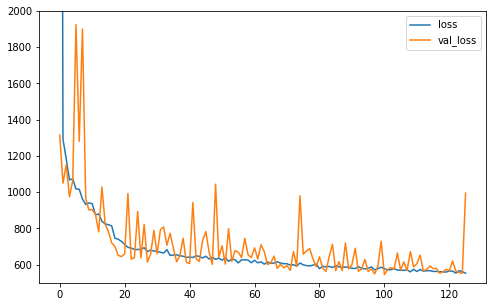

In [71]:
hist_df.plot(figsize=(8,5))
plt.gca().set_ylim(500,2000)
plt.show()

In [83]:
model_best.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 600)               9600      
                                                                 
 dense_9 (Dense)             (None, 300)               180300    
                                                                 
 dense_10 (Dense)            (None, 150)               45150     
                                                                 
 dense_11 (Dense)            (None, 3)                 453       
                                                                 
Total params: 235,503
Trainable params: 235,503
Non-trainable params: 0
_________________________________________________________________
